## ELEC-E7851 Computational User Interface Design
## Lecture 1: Computational Design with Combinatorial Optimization


# Menu Design with Combinatorial Optimization

### <b>[Antti Oulasvirta](http://users.comnet.aalto.fi/oulasvir/)</b> / Aalto University, Fall 2018

### Contents
1. Background
2. Basic concepts
3. Linear menu
4. Basic concepts: Revisited
5. Toolbar
6. Advanced topics

### In this unit, you will learn how to ...

* define a simple layout design task as a combinatorial optimization problem
* encode design goals and assumptions in its objective function
* choose and tune a simple search algorithm (solver)
 
### Practically, you will ...

* implement a random search -based optimizer for layout problems (linear menus, toolbars)
* discuss what interface design 'means' from a combinatorial perspective (and learn what makes it hard)
* explore consequences assumptions about user (in the objective function)
* boost efficiency with more advanced black box optimization methods (e.g., simulated annealing)

The notebook is an extensible plug-and-play approach to learn about layout design problems. 

<p>
<div class="alert alert-block alert-success"> 
<h3>Note about exercises</h3> 
<br>
Some exercises have been pre-filled in this notebook. Assignments (Tue Oct 30) will extend on this notebook.</div>
</p>

# 1. Background
-----------------

<p>
<div class="alert alert-block alert-success"> 
<h3>In-class discussion.</h3> 
<br>
What is is the link between computer science and optimization?</div>
</p>

### Optimization: A formalism for generating and adapting user interface designs 

*Optimization* refers to both the **outcome** (optimal design) and the **process** of systematically improving a design. User interface design, then, is algorithmic combination of discrete design decisions to obtain an optimal solution defined by an objective function. 

**Model-based combinatorial optimization** invites contributions from computer scientists, designers, and behavioral scientists. Three types of problems define the approach:
1. Modeling: Representations of design problem and knowledge in code
2. Inference: Inference of parameters of that model that best describe the designer's or users' goals.
3. Search: Algorithmically searchign for best solutions to the obtained problem.

Combinatorial optimization can be used not only to find an optimal design but to *assist a designer in various problems encountered in design*, such as:
* a unique (maximally different but equally good) solution
* a design that strikes the best compromise among competing objectives
* a design that is robust to changes in assumptions (e.g., about conditions of use or users)
* a design achieved by minimal changes to a current design
* a design that is within some k% from the present design. 

### Challenges 

Combinatorial optimization is a principled approach that insists on rigorous definitions of the design task and objectives. Be warned about:

1. Ramp-up costs: Formal definition and development of search methods can be laborious and risky;
2. At times exceedingly hard problems: While modest background in computer science suffices for first probes, real-world cases can be prohibitively hard and insist on professional support;
3. Knowledge gap: Defining meaningful objective functions (e.g., aesthetics, learnability) may require support from a cognitive or behavioral scientist with mathematical abilities.

# 2. Basic concepts

---------------

A **design task** consists of three elements:
1. **design space**: a finite set of alternative designs (search space; a.k.a. feasible set, candidate set); 
2. **objective function**: defines what is meant by 'good' or 'desirable' design;
3. **task instance**: sets task-specific parameters.

A task defined like this can then be attacked by a **solver**. It goes through the design space to find increasingly better designs. We use this structure in the following exercises.

<img src="imgs/overview.png" width="95%">

### Design task

In plain words, the task is to find the design that yields the highest value of a given objective (goodness) function. The following definition makes **the combinatorial structure of design** more explicit:
$$\mbox{Find } \mathbf{d} =
	\begin{pmatrix}
	d_1 \\
	d_2 \\
	\vdots \\
	d_n
	\end{pmatrix} \in \mathbf{D}
\mbox{ which maximizes } g(\mathbf{d})$$
where 
* $\mathbf{d}$ is an *n*-dimensional **design vector**,  each dimension describing a **design variable**, and
* $\mathbf{D}$ is **the set of feasible designs** (all vectors that fulfill constraints).

In plain words, a design is a vector in a multi-dimensional vector space. The objective function assigns each vector a value describing its goodness (or badness). When we optimize, we are looking for the vectors that obtain the highest value.

### Design space

A design space is the product of design variables under consideration. In a real design problem, some variables are fixed and some are open and to be decided by an optimizer. **A design variable** captures a decision using familiar types of variables, such as:
* boolean (e.g., Do we offer auditory feedback for button press or not?)
* integer (e.g., position of an element on x-axis)
* real (e.g., hue)
* categorical (e.g., type of an element).

In combinatorial optimization continuous variables are discretized. 

Functional and other requirements that 'rule out' candidate designs are collectively called **design constraints**. Example: When designing a Web layout, we should not place elements such that they overlap.

#### Estimating problem size

Defining a design space allows examining its size and structure. **Search spaces in user interface design are often very large**. For example, for $n$ functionality there are $2^n - 1$ ways to combine them to an application, which for only 50 functions means 1,125,899,906,842,623 possibilities. Further, assuming that 50 have been selected, they can be organized into a hierarhical menu in $100! \approx 10^{158}$ ways. [Combinatorics](https://www.tug.org/texshowcase/cheat.pdf) can be used to analyze problem sizes. 

### Objective function

The objective function $f( \mathbf{x} )$ states what you believe makes a design good. It is a function that assigns an **objective score (or value)** to each design candidate. The design candidate that obtains the highest (or lowest, when minimizing) score is the **optimum design**. The function can be about anything regarded desirable, such as surface features of the interface (e.g., minimal white space) or expected performance of users (e.g., 'task A should be completed as quickly as possible') and so on. In HCI, the quality of a interface is primarily determined by reference to end-users, for example user performance and experiences. 

There are many principled (and unprincipled) ways to obtain objective functions:
* Literature: A model or theory from prior work
* Data-driven approach: Use e.g. statistics or machine learning to obtain a model from data
* Standards, guidelines, and design patterns
* Heuristics, such as guidelines and best-found practices.

### Solver

After a task has been defined, a solver should be chosen and tuned to attack its instances. We will later look at solvers and their different properties. The process of 'solving' can be intuitively understood as search for highest peaks (when maximizing), or lowest valleys (when minimizing), in a vast 'landscape':

<img src="imgs/landscapes.png" width="80%">

<p>

<p>
<div class="alert alert-block alert-success"> 
<h3>What does 'optimality' mean?</h3> 
<br>
To say that a design is optimal is to say that in the defined set of candidate designs, there is no better design (global optimum has been identified). A design is **globally optimal** when the search method *guarantees* that it achieves the highest objective value in the whole design space. Such guarantees are offered by exhaustive search and exact methods (e.g., integer programming). When we do not have access to those methods, for example because the complexity of the objective function, we cannot claim global optimality. A design is **approximately optimal** when its objective value is within some margin of the optimal design, or when there is a good chance that only marginally better designs exist.</div>
</p>

The word 'optimal' is overused and misused. In order to claim that a design is optimal, one *must* answer the following questions:
1. The best out of which options? (design space)
2. The best for what? (design objectives and task instance)
3. The best with what guarantees? (search method)



# 3. Linear menu

----------

<img src="imgs/time-and-date.png" width="90%">

<br>

Consider the tabbed menu above. **Linear menu** is a prevalent type of user interfaces, which we find in mobile and desktop applications, web services, and consumer electronics. 

### Design Task

The design of a linear menu is a so-called **assignment problem**: *n* commands are to be *assigned* to *n* predetermined locations (slots) in order to maximize usability. In this task, we define it usability as **minimization of average selection time**. We insist that every slot must be filled with one command, and each command must be assigned only once (constraints). With these in mind, a linear menu with *n* items can be organized in *n!* ways. 

An overview of our design task:

| Aspect | Content  |
|----------|------|
| Design task | Given *n* menu items, decide their order to minimize expected selection time |
| Design space | All possible orderings of the items (*n!* in total)  |
| Objective function | Minimize expected selection time |
| Task instance | Specification of elements and their relative importances |
| Solver | Random search |

<p>
<div class="alert alert-block alert-success"> 
<h3>In-class exercise</h3> 
<br>
Change the *task instance* (e_weights) to obtain the design of timeanddate.com.
</div>
</p>

#### Code: Overview of structure

We offer a scaffolding for a plug-and-play black box optimizer:
* **candidate**: Our design space -- any ordering of *n* elements -- can be represented as a list in Python. The position of an element indicates its position in the menu.
* **linear_ST**: Our objective function. Computes expected search time in $O(n^2)$ time.
* **optimize**: Our solver. Takes any solver function and objective function as input. It then calls the solver using the objective function as its input. 

[Visual overview of 1st cell](imgs/codeoverview.png) <br>
[Visual overview of 2nd cell](imgs/codeoverview2.png)


In [1]:
import math, random
import render                   # For presenting layouts for rendering in Jupyter 
from IPython.display import SVG # SVG capabilities for showing layouts

# Returns Euclidean (unit) distance between two element positions in a grid layout
# Needed in our objective function (ST)
def distance (columns, i, j):
    return math.sqrt( abs(j / columns - i / columns)**2 + abs( i % columns - j % columns)**2) 
    
# Our objective function: Selection time (time it takes for users to select an item). 
# - A weighted sum of individual selection times weighed by their importance/probability (weight)
# - This simplifies the novice model of menu search time presented by Cockburn et al. CHI 2007 
def linear_ST (layout, columns, o_inputs):
    ST = 0.0
    reading_cost = 0.4 # assumed that scanning a single item takes 400 ms
    for i,element in enumerate(layout):
        try: 
            # Reading cost is a function of the number of elements intervening between top of menu and target
            ST += o_inputs[0][layout[i]] * distance(columns,0,i) * reading_cost
        except:
            pass
    return ST

# Our solver: Random search method
# - Shuffles a layout (list) and asks from objective function how good it is
# - Updates incumbent (best known design) whenever an improvement is found
# - Continues like this max_iters times
def random_search(max_iters, *args):
    columns = args[1] # Number of columns in this layout (=1) 
    obj_f = args[2]   # Handle to the objective function (=linear_ST)
    o_inputs = args[3:] # Arguments simply passed on to the objective function
    incumbent = args[0] # Best-known design thus far
    incumbent_ov = obj_f(incumbent, columns, o_inputs) # Set initial objective value

    for iter in range (0, max_iters):
        candidate = random.sample(incumbent, len(incumbent)) # Shuffle the design (note: this methos is slow)
        candidate_ov = obj_f(candidate, columns, o_inputs) # Then compute its objective value

        if candidate_ov < incumbent_ov: # Update best known if an improvement was found
            incumbent = candidate[:]
            incumbent_ov = candidate_ov
    return incumbent, incumbent_ov

    
# Our generic optimization service:
# - Solver and objective function are given as arguments
# - Used throughout the exercises
def optimize (iters, solver, *args):
    return solver(iters, *args)

Objective value (expected selection time): 2.5200000000000005


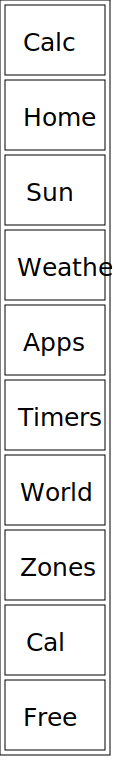

In [2]:
# Task instance

# Initial (seed) layout
seed_layout = ['Home', 'World','Zones','Cal','Weather','Sun','Timers','Calc','Apps', 'Free']  

# Element weights
e_weights   = {'Home':0.5, 'World':0.2,'Zones':0.1,'Cal':0.1,'Weather':0.3,'Sun':0.2,'Timers':0.2,'Calc':0.6,'Apps':0.2, 'Free Fun':0.1}

# Call the optimizer 
winner, winner_score = optimize(10000, random_search, seed_layout, 1, linear_ST, e_weights)

# Show result
print ("Objective value (expected selection time):", winner_score)
SVGlayout = render.SVGlayout(winner,1)
SVG(SVGlayout.inSVG)

<p>
<div class="alert alert-block alert-success"> 
<h3>In-class discussion</h3> 
<br>
This was toy case. Why?
</div>
</p>


# 4. Basic concepts: Revisited

------------------

To attack more interesting problems, we need to revisit the basic concepts:

### Design space: Representations

*Design space* is a representation of the candidate set of designs, laid out in a suitable format for some chosen search algorithm. [Some representations are illustrated here](imgs/representations.png). The choice of representation affects:
* availability of sovers; for example, the formulation of the concept of search neighborhood, which is exploited in local search methods
* computational efficiency
* ease of extension.

We use a *list* representation of layouts. It has its own pros and cons.

### Objective function

**An objective function** maps a design candidate $x \in \mathbf{X}$ to a real-valued predictor:
$f: \mathbf{X} \rightarrow \mathbb{R}$.
The choice of modeling formalism affects validity (hit rate, quality) and computational efficiency. Moreover, to be relevant in interaction design, this function should quantify an aspect like usability, enjoyability, ergonomics, or errors. Several objectives may need to be combined for reasonable results. This table shows 11 examples spanning task, cognitive, motor, and aesthetic aspects:

| Model | Example objective |  Application ref.  |
|----------|------|-------|
| Fitts' law  |  Minimize finger travel times | Zhai et al. UIST 2000 |
| Search-Decide-Point | Minimize visual search and selection time in menus  | Bailly et al. UIST 2013 |
| Coherence  |  Ensure related items are close to each other | Bailly et al. UIST 2013 |
| Familiarity |  Ensure spatial resemblance with a prior design | Dunlop et al. CHI 2013 |
| Keystroke-level model | Minimize task completion time for a sequential user task | Sarcar et al. IxAP 2016 |
| Active vision | Minimize visual search time when items are colored | Todi et al. DIS 2016 |
| Rosenholtz clutter model | Minimize visual clutter, maximize saliency | Rosenholtz et al. 2011 |
| Color harmony theory | Ensure harmonious color sets | Todi et al. DIS 2016 |
| Motor complexity theory | Minimize complexity of gesture sets | Sridhar et al. CHI 2015 |
| Ergonomics | Minimize shoulder stress | Bachynskyi et al. TOCHI 2015 |
| Internal clock model | Keep temporal task performance at desirable level | Lee et al. CHI 2016 |

**Subjective goals and preferences** can be dealt with by two main means: (1) by calibrating weights manually to correspond to some distribution of preferences, be they designers' or users'; (2) using machine learning to parametrize models to best correspond with individual priorities expressed in data. 

#### Approaches to defining objective functions

**Heuristics** are rules of thumb used in design,  such as 'white space should be minimized'.  Since most heuristics are 'weak' (carry little information), multiple are needed. This leads to the problem of **conflict resolution**: how to weigh the contribution of one heuristic against another. Another issue of heuristics is their questionable validity. (Note: not to be confused with heuristic optimization methods.)

**Metrics** are expressed as a real-valued functions that capture some feature of a design and link it to predictions of outcomes to users. Example: Overplotting metrics in the design of information visualizations.

**Regression** offers a more expressive yet quickly computable mathematical form of cost functions:
$y = f (\mathbf{x}, \mathbf{\beta} ) + \epsilon$ . 

**Simulator-based models** are step-wise executed functions $M$ that map the model parameters $\theta$ to data. In HCI, the parameters $\theta$ capture both parameters of the user and those of the task or context. Simulators are **generative models** that predict not only the outcomes of interaction but intermediate steps, or the process of interaction. A simulator may address multiple design objectives in a coherent manner that require less weight-tuning. However, they are non-linear and significantly more expensive to execute, ruling out exact methods (e.g, integer programming).

In addition, there is a vast number of machine learning of different types available.

### Task instance

*Task instance* refers to task-specific input values to the design task and objective function, such as:
* Which elements are to be decided (sizes, colors etc)?
* Relative importances of design objectives (e.g,. how much is usability more important than security?)
* Properties of targeted user groups, such as goals, capabilities, and interaction styles of users (e.g., what do they want to achieve with the interface?)
* Constraints of the interface (e.g., screen resolution, input method).

### Optimization method

Modern methods in combinatorial optimization can be divided into two main classes:
1. **Black-box or heuristic methods** do not necessitate assumptions about  the objective function, but rather consider it as a black-box -- like an oracle -- that tells them the objective value of a given candidate it has generated.  
2. **Exact methods** such as integer programming offer mathematical guarantees for solutions but insist on analysis of the objective function for revealing simplifications and links to known tasks in the optimization literature. Integer programming is covered in the other part of the day.

# 5. Toolbar design

---------------

**Toolbars**, widely used in desktop and web applications, are **grid menus**. To design a toolbar, ordering elements is not enough. One needs to consider how to ensure that related items are close to each other (grouping).

| New aspect | Content  |
|----------|------|
| Design objectives | Minimum selection time; **Your objective function for grouping** |
| Task instance | 12 elements in a productivity app |

<img src="imgs/toolbar.png" width="75%">

<p>
<div class="alert alert-block alert-success"> 
<h3>Exercise: Implement an objective function for element-grouping.</h3> 
<br>
Implement an objective function for grouping. It should try to keep *related items close to each other*. **Tip:** Association value between Your function can utilize *distance* function defined in the earlier cell. Call syntax for distance function: 'distance(columns, i,j)' </div>
</p>


In [77]:
# A new objective function that considers two objectives: selection time and YOUR function
def ST_and_myO (layout, columns, o_inputs):
    return linear_ST (layout,columns,o_inputs[0:]) + 1.0 * myObjective (layout,columns,o_inputs[1:])

def ST_and_myO_normalized(layout, columns, o_inputs):
    lst = linear_ST (layout,columns,o_inputs[0:])
    ass = myObjective (layout,columns,o_inputs[1:])
    v = 0.5
    # TODO pareto frontier by changing v from 0 to 1
    # TODO normalize
    return v*lst + (1-v)*ass

def myObjective (layout, columns, o_inputs):
    ov = 0.0
    for i in range(0, len(layout)):
        for j in range(i+1, len(layout)):
            # We pick the association score, if any, from e_weights
            if o_inputs[0].get(layout[i]+layout[j]): 
                association = o_inputs[0].get(layout[i]+layout[j])
            elif o_inputs[0].get(layout[j]+layout[i]): 
                association = o_inputs[0].get(layout[j]+layout[i])
            else: 
                association = 0

            # TASK: ADD YOUR OBJECTIVE FUNCTION HERE
            # Added by Antti
            ov += distance(columns, i,j) * association

    return ov

Objective value: 4.738125180402307


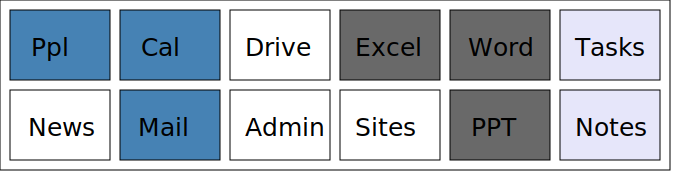

In [78]:
# Task instance

seed_layout = ['Tasks','Word','Excel','PPT','Admin','Mail','Cal','Ppl','News','Drive','Sites','Notes']
e_weights = {'Tasks':0.1,'Word':0.2,'Excel':0.15,'PPT':0.2,'Admin':0.05,'Mail':0.5,'Cal':0.4,'Ppl':0.4,'News':0.4,'Drive':0.2,'Sites':0.01, 'Notes':0.05}
associations = {'WordExcel':0.5,'WordPPT':0.5,'MailCal':0.3,'CalPpl':0.3,'TasksCal':0.2,'NotesTasks': 0.3}
columns = 6

# Optimization
winner, winner_score = optimize(3000, random_search, seed_layout, columns, ST_and_myO, e_weights, associations)

# Results
print ("Objective value:", winner_score)
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

In [79]:
x1, zU1 = optimize(3000, random_search, seed_layout, columns, linear_ST, e_weights, associations)
x2, zU2 = optimize(3000, random_search, seed_layout, columns, myObjective, e_weights, associations)
zN1 = max(linear_ST(x1, columns, [e_weights]), myObjective(x1, columns, [associations]))
zN2 = max(linear_ST(x2, columns, [e_weights]), myObjective(x2, columns, [associations]))

In [80]:
zU1, zU2, zN1, zN2

(1.8429685045466868, 0.0, 3.1125888582353607, 5.123316391936875)

In [83]:
def normalized_objective(u1, u2, layout, columns, o_inputs):
    return u1 * linear_ST(layout, columns, o_inputs[0:]) / (zN1 - zU1) + \
           u2 * myObjective(layout, columns, o_inputs[1:]) / (zN2 - zU2)

In [97]:
from functools import partial
u1 = 0.8
u2 = 1 - u1
objective = partial(normalized_objective, u1, u2)
winner, winner_score = optimize(3000, random_search, seed_layout, columns, objective, e_weights, associations)

Objective value: 1.3008496500755102


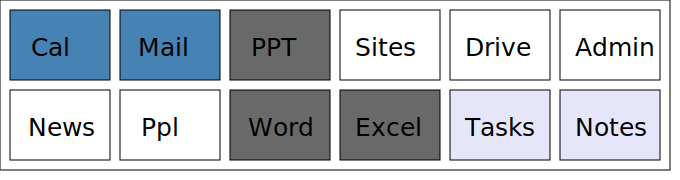

In [98]:
# Results
print ("Objective value:", winner_score)
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

In [30]:
def normalize(weights: dict):
#     w_min = min(weights.values())
    w_min = 0
    w_max = max(weights.values())
    w = dict()
    for key in weights:
        w[key] = (weights[key] - w_min) / (w_max - w_min)
    return w

def ST_and_myO_normalized(u1, u2, layout, columns, o_inputs):
    """A new objective function that considers two objectives: selection time and YOUR function"""
    # TODO: 1. How does changing objective_weight effect the outcome?
    # TODO: 2. Implement normalization such that objective weight is not
#           sensitive to change in e_weight or associations.
    reading_cost = 0.4
    return u1 * linear_ST(layout, columns, o_inputs[0:]) / reading_cost + \
           u2 * myObjective(layout, columns, o_inputs[1:])

In [68]:
normalized(e_weights), normalized(associations)

({'Admin': 0.1,
  'Cal': 0.8,
  'Drive': 0.4,
  'Excel': 0.3,
  'Mail': 1.0,
  'News': 0.8,
  'Notes': 0.1,
  'PPT': 0.4,
  'Ppl': 0.8,
  'Sites': 0.02,
  'Tasks': 0.2,
  'Word': 0.4},
 {'CalPpl': 0.6,
  'MailCal': 0.6,
  'NotesTasks': 0.6,
  'TasksCal': 0.4,
  'WordExcel': 1.0,
  'WordPPT': 1.0})

In [70]:
from functools import partial

def pareto_optimal_design(u1=0.5):
    assert 0 <= u1 <= 1
    u2 = 1 - u1
    winner, winner_score = optimize(
        10000, 
        random_search, 
        seed_layout, 
        columns, 
        partial(ST_and_myO_normalized, u1, u2), 
        normalized(e_weights), 
        normalized(associations))
    return winner, winner_score

Objective value: 8.962791373007523


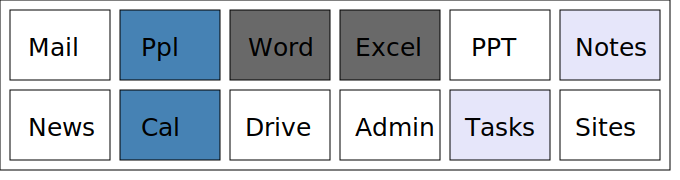

In [71]:
winner, winner_score = pareto_optimal_design(u1=1)
print ("Objective value:", winner_score)
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

Objective value: 8.416413768516975


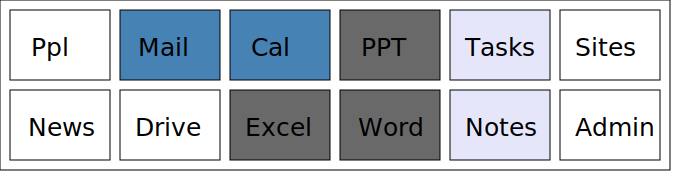

In [63]:
winner, winner_score = pareto_optimal_design(u1=0.8)
print ("Objective value:", winner_score)
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

Objective value: 7.978572159720607


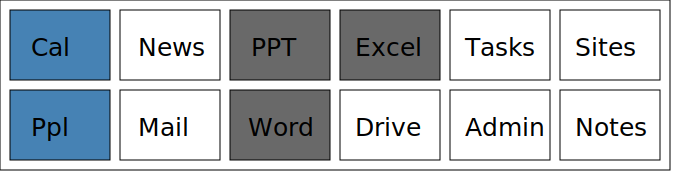

In [64]:
winner, winner_score = pareto_optimal_design(u1=0.6)
print ("Objective value:", winner_score)
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

Objective value: 7.0295388239535725


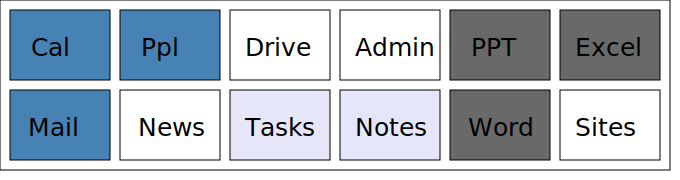

In [65]:
winner, winner_score = pareto_optimal_design(u1=0.4)
print ("Objective value:", winner_score)
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

Objective value: 6.0034607777855635


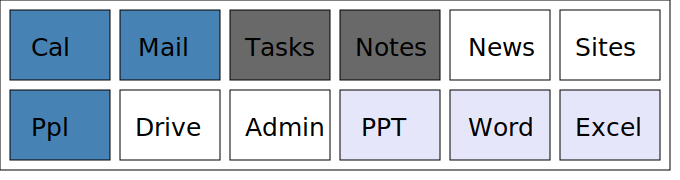

In [66]:
winner, winner_score = pareto_optimal_design(u1=0.2)
print ("Objective value:", winner_score)
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

Objective value: 4.351029572836457


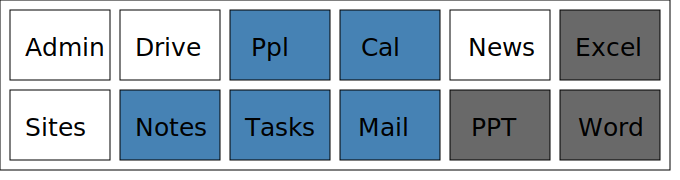

In [72]:
winner, winner_score = pareto_optimal_design(u1=0.0)
print ("Objective value:", winner_score)
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

## 6. Improving the Solver: Simulated Annealing

Results obtained thus far have been reasonable, because the problems have been small. To attack larger problems efficiently, and to introduce first concepts of heuristic methods, we turn to a classic: **simulated annealing**
* [Main idea in three diagrams](imgs/sa.jpg)
* [Pseudo-code](imgs/sa-pseudocode.png) 

We run the previous exercise using simulated annealing, observing that (on average) better objective value is obtained with the same computation budget. 

### Basic concepts

**Local search** relies on a definition of a **neighborhood** of a given design. For example, the neighboring layouts of a keyboard layouts are those that can be constructed by swapping a pair of letters. Starting from an initial configuration, local search proceeds by chosing a neighboring configuration with an objective value that is at least as good as the current one. These choices could be, for example, greedy or randomized.

**Simulated Annealing** exploits local and random search in a exploration/exploitation scheme. A neighboring configuration is not only chosen when it yields to a better objective value but also with a certain probability when it is worse. However, this probability decreases with the extent of the detoriation of the objective value (temperature). 

<p>
<div class="alert alert-block alert-success"> 
<h3>Exercise: Define a 'neighboring design' for simulated annealing</h3> 
<br>
To use SA, need to add a function that allows the simulated annealer to explore the *neighborhood* of a current design. While there are many possibilities to construct a neighborhood. Your task is to define one. Bonus: Define control parameter 'n' for distance in the neighborhood.</div>
</p>

Objective value: 4.002541067322677


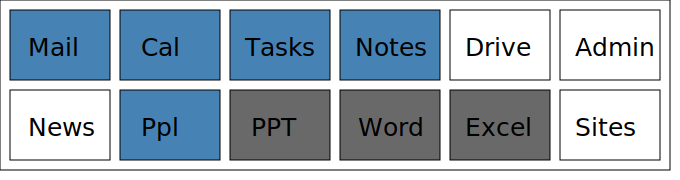

In [122]:
# Returns a neighbor of a layout (list); 
# has a parameter 'n' to control distance in the neighborhood (optional) 

def neighbor(layout, n=1):
    """
    Returns a neighbor of a layout (list);
    has a parameter 'n' to control distance in the neighborhood (optional)
    """
    # Choose a random element from layout
    i = random.randrange(0, len(layout))

    # Filter all elements that have distance over n.
    canditates = []
    for j in range(len(layout)):
        if i == j:
            continue
        if distance(columns, i, j) <= n:
            canditates.append(j)

    # Choose a random element from remaining elements
    j = random.choice(canditates)

    # Swap the elements i and j.
    new_layout = layout[:]
    new_layout[i] = layout[j]
    new_layout[j] = layout[i]
    return new_layout

# Solver: Simulated annealing using exponential cooling schedule
def anneal(k_max, *args):
    s = args[0] # solution seed
    columns = args[1] 
    obj_f = args[2]
    o_inputs = args[3:]
    s_ov = obj_f(s, columns, o_inputs)
    T_min, T_initial, alpha = 0.0000001, 10000, 0.991 # Hyperparameters 
    converged = False
    
    for k in range (0, k_max):
        T = max(T_min, T_initial * math.pow(alpha,k)) # exponential cooling schedule
        s_new = neighbor(s[:], args[-1])
        s_new_ov = obj_f(s_new, columns, o_inputs)

        delta = s_new_ov - s_ov
        if delta < 0: # accept the neighbor if it is better 
            s = s_new[:]
            s_ov = s_new_ov
        elif random.random() < math.exp(-delta/T): # if not, decide according to the Metropolis rule
            s = s_new[:]
            s_ov = s_new_ov
    return s, s_ov

# Task instance (same as above)
seed_layout = ['Tasks','Word','Excel','PPT','Admin','Mail','Cal','Ppl','News','Drive','Sites','Notes']
e_weights = {'Tasks':0.1,'Word':0.2,'Excel':0.15,'PPT':0.2,'Admin':0.05,'Mail':0.5,'Cal':0.4,'Ppl':0.4,'News':0.4,'Drive':0.2,'Sites':0.01, 'Notes':0.05}
associations = {'WordExcel':0.5,'WordPPT':0.5,'MailCal':0.3,'PplCal':0.3,'TasksCal':0.2,'NotesTasks': 0.3}
columns = 6

# Optimization
winner, winner_score = optimize(10000, anneal, seed_layout, columns, ST_and_myO, e_weights, associations, 4)

# Present results
print ("Objective value:", winner_score)
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

## Selected further readings

* Karrenbauer, A., Oulasvirta, A. (2014). [Keyboard optimization with integer programming](http://resources.mpi-inf.mpg.de/keyboardoptimization/). Proc. UIST'14. 
* Oulasvirta, A. (2017). [User Interface Design with Combinatorial Optimization](http://users.comnet.aalto.fi/oulasvir/pubs/UIdesign_with_combinatorial_optimization_IEEEComputer_2017_Oulasvirta.pdf), IEEE Computer 50 (1).
* Bailly, G. et al. (2013). [MenuOptimizer:  Interactive Optimization of Menu Systems](https://www.gillesbailly.fr/publis/BAILLY_MenuOptimizer.pdf), Proc. UIST 2013. 
* Todi, K. et al. [Sketchplorer: Sketch and explore with an optimizer](http://www.kashyaptodi.com/sketchplore/), Proc. DIS'16. 
* Micallef, L. et al. (2017). [Towards perceptual optimization of the visual design of scatterplots](http://ieeexplore.ieee.org/document/7864468/), IEEE TGCV
* Feit, A., Oulasvirta, A. (2105). [Exercises in assignment problems in keyboard design](https://www.slideshare.net/oulasvir/modelbased-user-interface-optimization-part-ii-letter-assignment-at-sicsa-summer-school-on-computational-interaction-2015?qid=4320d34c-8c76-42c8-9cd3-69b2260dbc3a&v=&b=&from_search=2), Lecture notes from 1st Computational Interaction Summer School 2015, Glasgow

In [175]:
from collections import defaultdict
# Optimization
r = [2000, 4000, 6000, 8000, 10000]
trials = 10
d_anneal = defaultdict(list)
d_random = defaultdict(list)
for iterations in r:
    for _ in range(trials):
        winner, winner_score = optimize(
            iterations, anneal, seed_layout, columns, ST_and_myO, e_weights,
            associations, 1.1)
        d_anneal[iterations].append(winner_score)

        winner, winner_score = optimize(
            iterations, random_search, seed_layout, columns, ST_and_myO, e_weights,
            associations)
        d_random[iterations].append(winner_score)

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for key, values in d_anneal.items():
    plt.scatter([key for _ in range(len(values))], values, color='b', alpha=0.7)
for key, values in d_random.items():
    plt.scatter([key for _ in range(len(values))], values, color='y', alpha=0.7)

# plt.legend()
plt.xlabel("Iterations")
plt.ylabel("$f(x)$")
plt.savefig("annealing_vs_random_search_n1.png")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'